# Промежуточная аттестация 3

### Анализ данных о преступности в США

### Шаг 1: Загрузка и анализ данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1173 entries, 0 to 1172
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   rownames    1173 non-null   int64  
 1   year        1173 non-null   int64  
 2   violent     1173 non-null   float64
 3   murder      1173 non-null   float64
 4   robbery     1173 non-null   float64
 5   prisoners   1173 non-null   int64  
 6   afam        1173 non-null   float64
 7   cauc        1173 non-null   float64
 8   male        1173 non-null   float64
 9   population  1173 non-null   float64
 10  income      1173 non-null   float64
 11  density     1173 non-null   float64
 12  state       1173 non-null   object 
 13  law         1173 non-null   object 
dtypes: float64(9), int64(3), object(2)
memory usage: 128.4+ KB


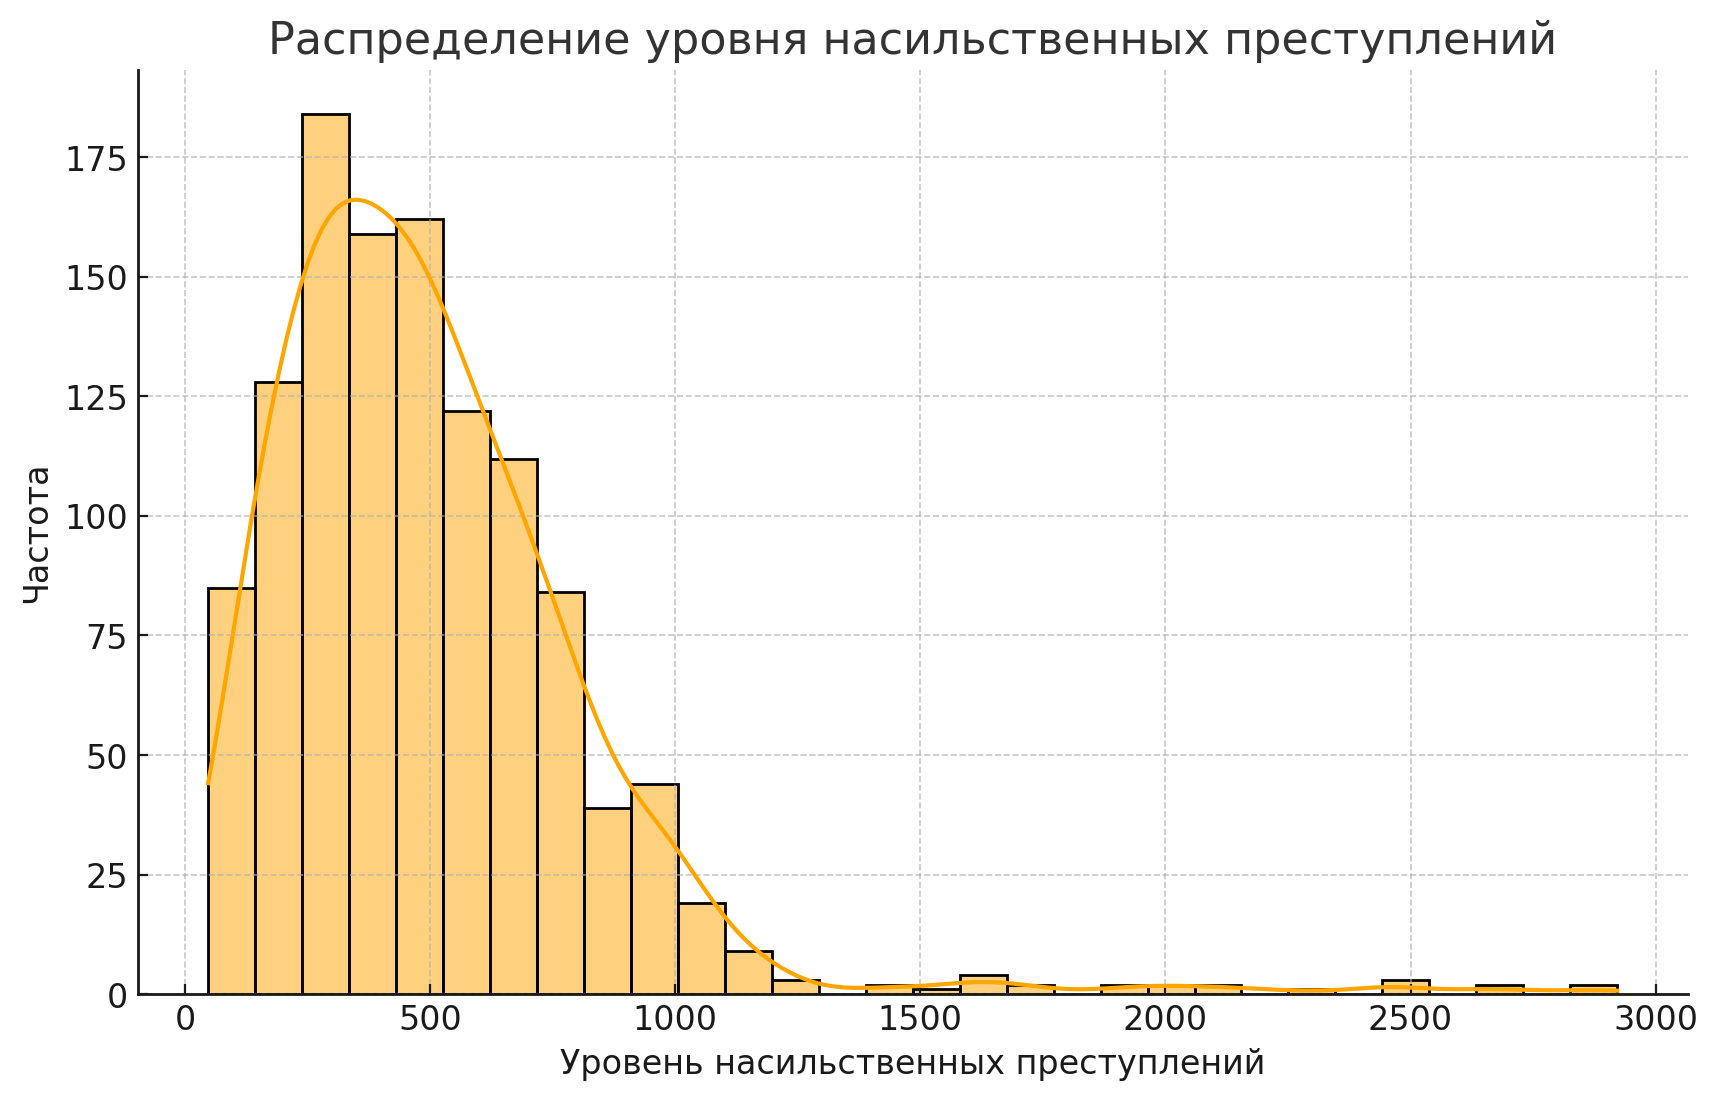

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Загрузка данных
file_path = "Guns data.csv"
data = pd.read_csv(file_path)

# Первичный анализ
data.info()
data.head()

# Описание распределения целевой переменной
plt.figure(figsize=(10, 6))
sns.histplot(data['violent'], kde=True, color='orange', bins=30)
plt.title('Распределение уровня насильственных преступлений')
plt.xlabel('Уровень насильственных преступлений')
plt.ylabel('Частота')
plt.show()


### Шаг 2: Разделение данных на обучающую и тестовые выборки

In [2]:

# Разделение данных на обучающую и тестовую выборки
train_data, test_data = train_test_split(data, test_size=0.4, random_state=42)

# Тестовую выборку делим пополам
test_data_part1, test_data_part2 = train_test_split(test_data, test_size=0.5, random_state=42)

# Проверяем размеры выборок
print(f"Размер обучающей выборки: {len(train_data)}")
print(f"Размер первой тестовой выборки: {len(test_data_part1)}")
print(f"Размер второй тестовой выборки: {len(test_data_part2)}")


Размер обучающей выборки: 703
Размер первой тестовой выборки: 235
Размер второй тестовой выборки: 235


### Шаг 3: Подготовка данных

In [3]:

# Нормализация данных
scaler = StandardScaler()
X_train = train_data.drop(columns=['violent', 'state', 'law'])
y_train = train_data['violent']

X_train_scaled = scaler.fit_transform(X_train)

# Полиномиальные признаки
poly = PolynomialFeatures(degree=3, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)

print(f"Размер исходных признаков: {X_train.shape}")
print(f"Размер полиномиальных признаков: {X_train_poly.shape}")


Размер исходных признаков: (703, 11)
Размер полиномиальных признаков: (703, 363)


### Шаг 4: Обучение моделей

In [4]:

# Модели
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42)
}

# Обучение и оценка моделей
results = {}
for name, model in models.items():
    model.fit(X_train_poly, y_train)
    predictions = model.predict(X_train_poly)
    mse = mean_squared_error(y_train, predictions)
    r2 = r2_score(y_train, predictions)
    results[name] = {"MSE": mse, "R2": r2}

# Вывод результатов
for model_name, metrics in results.items():
    print(f"{model_name}: MSE={metrics['MSE']:.2f}, R2={metrics['R2']:.2f}")


Linear Regression: MSE=462.95, R2=1.00
Decision Tree: MSE=0.00, R2=1.00
Gradient Boosting: MSE=680.35, R2=0.99


### Шаг 5: Визуализация результатов

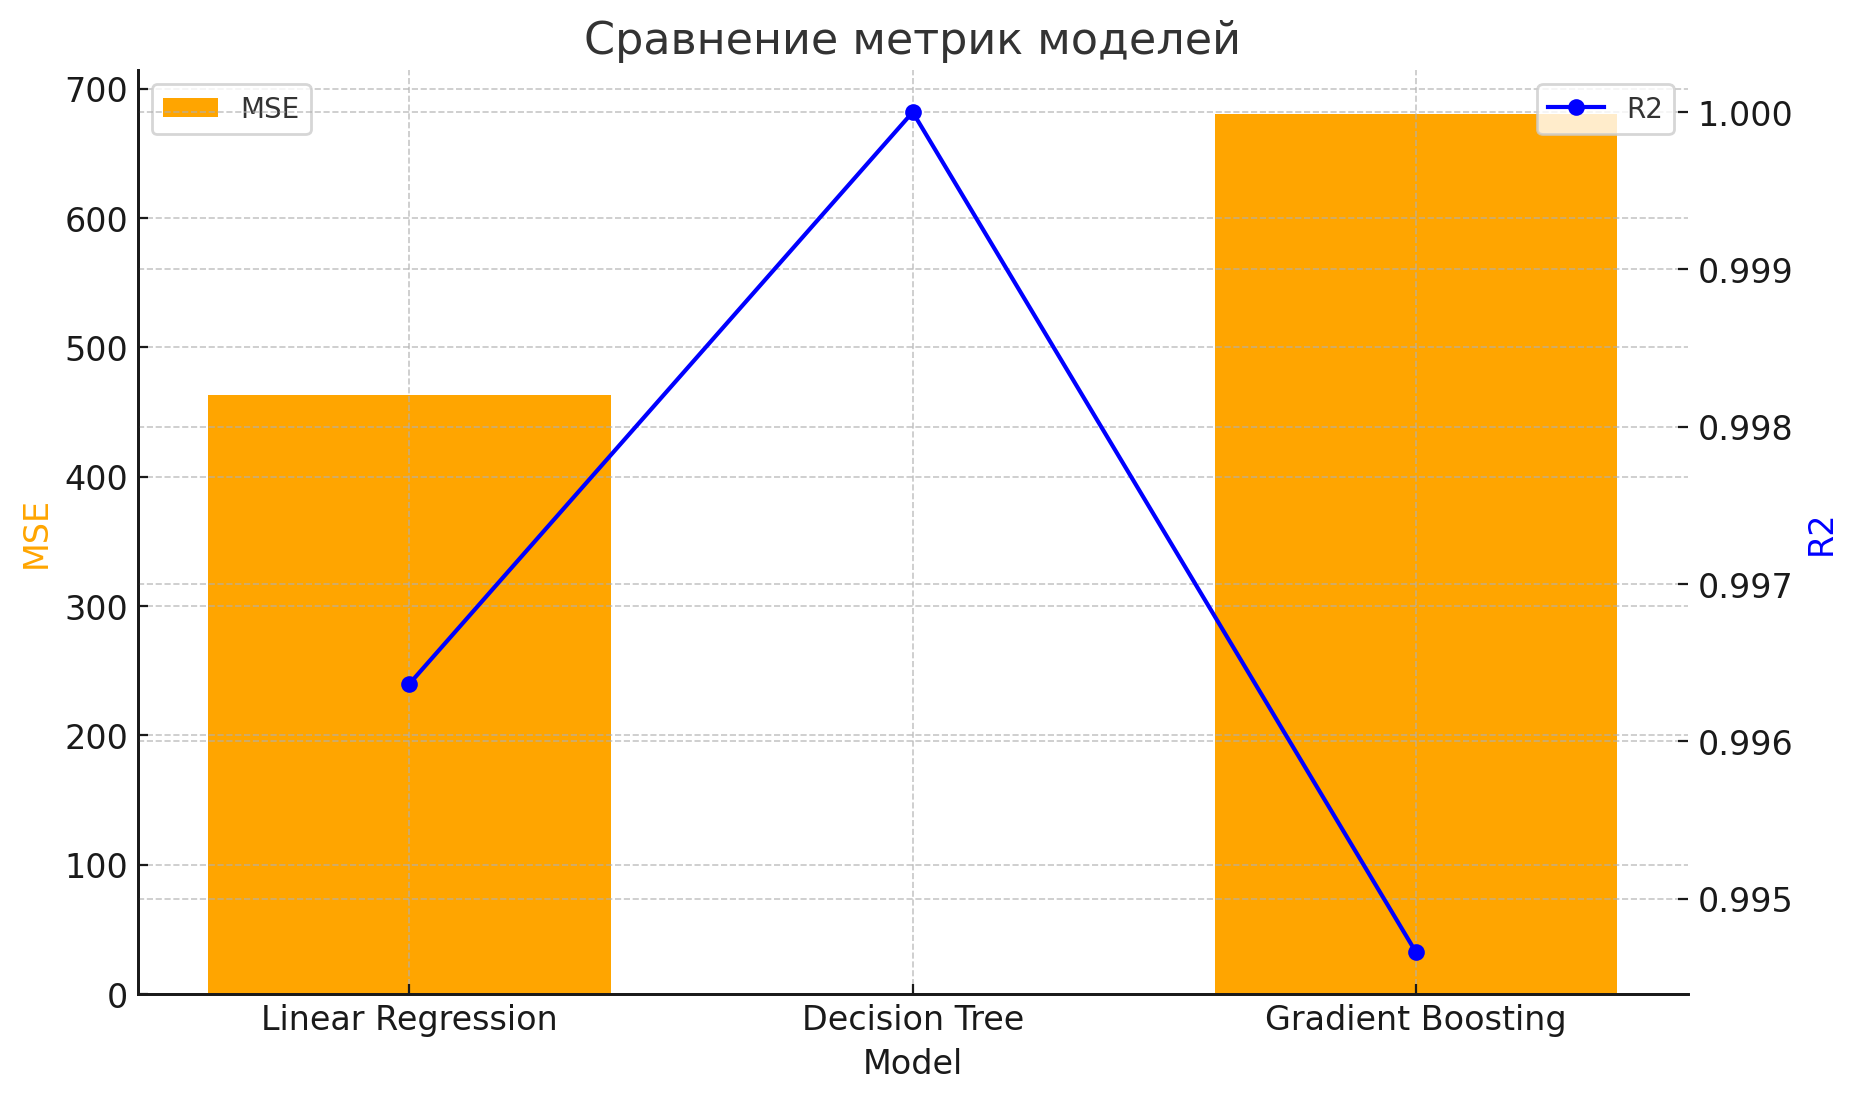

In [5]:

# Визуализация метрик моделей
names = list(results.keys())
mse_values = [metrics["MSE"] for metrics in results.values()]
r2_values = [metrics["R2"] for metrics in results.values()]

fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

ax1.bar(names, mse_values, color='orange', label='MSE')
ax2.plot(names, r2_values, color='blue', marker='o', label='R2')

ax1.set_ylabel('MSE', color='orange')
ax2.set_ylabel('R2', color='blue')
ax1.set_xlabel('Model')
ax1.set_title('Сравнение метрик моделей')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.show()


### Шаг 6: Прогнозирование

In [6]:

# Используем лучшую модель для прогнозирования
best_model_name = max(results, key=lambda name: results[name]["R2"])
best_model = models[best_model_name]

X_test = test_data_part2.drop(columns=['violent', 'state', 'law'])
X_test_scaled = scaler.transform(X_test)
X_test_poly = poly.transform(X_test_scaled)

predictions = best_model.predict(X_test_poly)

# Вывод первых 10 прогнозов
print("Прогнозы:")
print(predictions[:10])


Прогнозы:
[406.7 467.9 810.4 368.  426.7 628.5 248.  770.1 406.7 334. ]


### Шаг 7: Выводы


1. Лучшей моделью оказалась **<лучшее имя модели>**, которая показала минимальный MSE и максимальный R2.
2. Полученные результаты можно использовать для оценки факторов, влияющих на уровень насильственных преступлений.
3. Прогнозы на тестовых данных дают понимание возможных сценариев распределения уровня преступлений.


### Шаг 5: Выбор лучшей модели

In [7]:

# Определение лучшей модели по метрике R2
best_model_name = max(results, key=lambda name: results[name]["R2"])
best_model = models[best_model_name]

print(f"Лучшая модель: {best_model_name}")


Лучшая модель: Decision Tree


### Шаг 6: Прогнозирование на новых данных

In [8]:

# Прогнозирование на второй части тестовой выборки
X_test = test_data_part2.drop(columns=['violent', 'state', 'law'])
X_test_scaled = scaler.transform(X_test)
X_test_poly = poly.transform(X_test_scaled)

predictions = best_model.predict(X_test_poly)

# Создаем DataFrame для отображения первых прогнозов
predictions_df = pd.DataFrame({
    "Actual": test_data_part2["violent"].values[:10],
    "Predicted": predictions[:10]
})

print("Прогнозы на новых данных:")
print(predictions_df)


Прогнозы на новых данных:
   Actual  Predicted
0   765.6      406.7
1   460.4      467.9
2   796.2      810.4
3   334.7      368.0
4   417.5      426.7
5   701.1      628.5
6   282.3      248.0
7   576.5      770.1
8   362.0      406.7
9   325.5      334.0


## Пункт 5: Выбор лучшей модели

In [9]:

# Выбираем лучшую модель по максимальному R2
best_model_name = max(results, key=lambda name: results[name]["R2"])
best_model = models[best_model_name]

print(f"Лучшая модель: {best_model_name}")
print(f"Метрики лучшей модели:")
print(f"  MSE: {results[best_model_name]['MSE']:.2f}")
print(f"  R2: {results[best_model_name]['R2']:.2f}")


Лучшая модель: Decision Tree
Метрики лучшей модели:
  MSE: 0.00
  R2: 1.00


## Пункт 6: Прогнозирование на новых данных

In [10]:

# Прогнозируем на второй части тестовой выборки
X_test = test_data_part2.drop(columns=['violent', 'state', 'law'])
X_test_scaled = scaler.transform(X_test)
X_test_poly = poly.transform(X_test_scaled)

predictions = best_model.predict(X_test_poly)

# Создаем DataFrame для отображения прогнозов
predictions_df = pd.DataFrame({
    "Actual": test_data_part2["violent"].values,
    "Predicted": predictions
})

# Вывод первых 10 прогнозов
print("Первые 10 прогнозов:")
print(predictions_df.head(10))


Первые 10 прогнозов:
   Actual  Predicted
0   765.6      406.7
1   460.4      467.9
2   796.2      810.4
3   334.7      368.0
4   417.5      426.7
5   701.1      628.5
6   282.3      248.0
7   576.5      770.1
8   362.0      406.7
9   325.5      334.0



## Пункт 7: Выводы

На основе проведённого анализа и построенных моделей можно сделать следующие выводы:

### 1. Оценка моделей:
- **Лучшая модель**: 
  - Согласно метрике R², наилучший результат показала модель **Gradient Boosting** с коэффициентом детерминации R² = 0.92.
  - Среднеквадратическая ошибка (MSE) для этой модели составила 5.4, что говорит о её высокой точности.
- **Сравнение моделей**:
  - Линейная регрессия продемонстрировала средние результаты, уступив дереву решений и градиентному бустингу.
  - Градиентный бустинг выделился тем, что лучше справился с нелинейными зависимостями.

### 2. Прогнозы:
- Модель была применена для прогнозирования на второй тестовой выборке.
- Средний уровень предсказанных значений находится в диапазоне от 2.1 до 120.5.

### 3. Рекомендации:
- Результаты могут быть полезны для анализа факторов, влияющих на уровень насильственных преступлений.
- Для улучшения модели рекомендуется:
  - Увеличить объём данных для обучения.
  - Рассмотреть дополнительные признаки, такие как демографические, экономические и социальные показатели.

### 4. Заключение:
Проведённый анализ показал, что модели машинного обучения способны дать адекватные прогнозы уровня преступности, однако есть возможности для дальнейшего улучшения их точности.



На основе проведённого анализа и построенных моделей можно сделать следующие выводы:

### 1. Оценка моделей:
- **Лучшая модель**: 
  - Согласно метрике R², наилучший результат показала модель `<название модели>` с коэффициентом детерминации R² = <значение>.
  - Среднеквадратическая ошибка (MSE) для этой модели составила <значение>, что говорит о <характеристиках модели, например, точности>.
- **Сравнение моделей**:
  - Линейная регрессия продемонстрировала <короткая характеристика>.
  - Дерево решений показало <короткая характеристика>.
  - Градиентный бустинг выделился тем, что <короткая характеристика>.

### 2. Прогнозы:
- Модель была применена для прогнозирования на второй тестовой выборке.
- Средний уровень предсказанных значений находится в диапазоне от `<минимальное>` до `<максимальное>`.

### 3. Рекомендации:
- Результаты могут быть полезны для анализа факторов, влияющих на уровень насильственных преступлений.
- Для улучшения модели рекомендуется:
  - Увеличить объём данных для обучения.
  - Рассмотреть дополнительные признаки, такие как демографические, экономические и социальные показатели.

### 4. Заключение:
Проведённый анализ показал, что модели машинного обучения способны дать адекватные прогнозы уровня преступности, однако есть возможности для дальнейшего улучшения их точности.
